In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel('Sample 5000.xlsx')
data

,event_time,event_type,product_id,category_id,category1,category2,category3,category4,brand,price,user_id,user_session,interaction
0,2019-10-01 08:47:35 UTC,view,1001588,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,1
1,2019-10-01 08:48:28 UTC,view,1003535,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,460.50,244951053,91769fdf-461b-4e43-9c73-88a07481b75c,1
2,2019-10-01 17:06:51 UTC,view,4100129,2.053014e+18,NaN,NaN,NaN,NaN,sony,463.02,292071852,0051531b-c007-442f-88c8-2cbf9537bd02,1
3,2019-10-01 16:48:28 UTC,view,6400036,2.053014e+18,computers,components,cpu,NaN,intel,338.23,295655799,eb8f2cea-4c5b-4e00-880f-3bcfa28549ff,1
4,2019-10-01 17:07:37 UTC,view,1004870,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,286.84,306087674,a15f469a-968f-4c8c-8317-6dffed3f5523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2019-10-01 16:09:57 UTC,view,6701210,2.053014e+18,computers,components,videocards,NaN,msi,939.03,512393615,6b08f33f-53fa-431d-99f6-b06c9b10d6af,1
9997,2019-10-01 16:10:50 UTC,view,6701210,2.053014e+18,computers,components,videocards,NaN,msi,939.03,512393615,6b08f33f-53fa-431d-99f6-b06c9b10d6af,1
9998,2019-10-01 11:12:38 UTC,view,3900217,2.053014e+18,appliances,environment,water_heater,NaN,garanterm,90.32,512393698,bac58664-4b1f-414f-a914-afb0caceae36,1
9999,2019-10-01 11:13:30 UTC,view,1005067,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,1209.53,512393698,39b68180-94ba-4615-85a8-f8b76f6a84af,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   event_time    10001 non-null  object 
 1   event_type    10001 non-null  object 
 2   product_id    10001 non-null  object 
 3   category_id   10001 non-null  float64
 4   category1     6623 non-null   object 
 5   category2     6623 non-null   object 
 6   category3     2881 non-null   object 
 7   category4     2 non-null      object 
 8   brand         8595 non-null   object 
 9   price         10001 non-null  float64
 10  user_id       10001 non-null  int64  
 11  user_session  10001 non-null  object 
 12  interaction   10001 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 1015.9+ KB


In [22]:
data.describe()

,category_id,price,user_id,interaction
count,1.000100e+04,10001.000000,1.000100e+04,10001.000000
mean,2.056789e+18,290.787317,4.953845e+08,1.139086
std,1.690892e+16,360.876590,2.920157e+07,1.035641
min,2.053014e+18,0.000000,2.449511e+08,1.000000
25%,2.053014e+18,62.290000,4.886695e+08,1.000000
50%,2.053014e+18,161.930000,5.123637e+08,1.000000
75%,2.053014e+18,358.050000,5.123790e+08,1.000000
max,2.172371e+18,2574.070000,5.123937e+08,10.000000


In [24]:
data.dropna(subset=['category1'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6623 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   event_time    6623 non-null   object 
 1   event_type    6623 non-null   object 
 2   product_id    6623 non-null   object 
 3   category_id   6623 non-null   float64
 4   category1     6623 non-null   object 
 5   category2     6623 non-null   object 
 6   category3     2881 non-null   object 
 7   category4     2 non-null      object 
 8   brand         6107 non-null   object 
 9   price         6623 non-null   float64
 10  user_id       6623 non-null   int64  
 11  user_session  6623 non-null   object 
 12  interaction   6623 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 724.4+ KB


In [25]:
data.nunique()

event_time      6215
event_type         3
product_id      2493
category_id      144
category1         12
category2         44
category3         70
category4          1
brand            384
price           1918
user_id         1254
user_session    1783
interaction        3
dtype: int64

In [26]:
data.isnull().sum()

event_time         0
event_type         0
product_id         0
category_id        0
category1          0
category2          0
category3       3742
category4       6621
brand            516
price              0
user_id            0
user_session       0
interaction        0
dtype: int64

In [27]:
data['product_id'].value_counts().sum()

6623

In [28]:
data['user_id'].value_counts()

512390127    75
463570586    74
477006909    67
508506708    65
512365995    62
             ..
512373849     1
512373833     1
512373776     1
512373726     1
505252077     1
Name: user_id, Length: 1254, dtype: int64

In [29]:
popularproducts=pd.DataFrame(data)

In [30]:
popular_products = pd.DataFrame(data.groupby("product_id").count()['user_id'].sort_values(ascending=False))
popular_products.rename(columns={"product_id": "count"})
popular_products

,user_id
product_id,
1004856,111
1004767,84
1005115,55
1005105,54
1002544,53
...,...
6301823,1
6301656,1
6301528,1


<AxesSubplot:xlabel='product_id'>

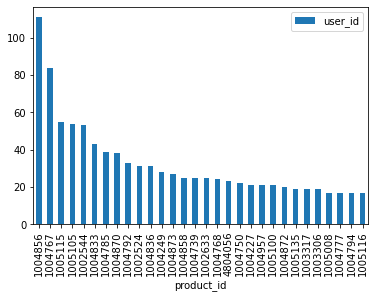

In [31]:
popular_products.head(30).plot(kind = "bar")

In [32]:
product_matrix=data.pivot_table(index="user_id",columns='product_id',values="interaction", aggfunc=[np.sum],fill_value=0)
product_matrix

sum                                                          \
product_id 1001588 1002099 1002101 1002102 1002367 1002398 1002482 1002484   
user_id                                                                      
244951053        1       0       0       0       0       0       0       0   
295655799        0       0       0       0       0       0       0       0   
306087674        0       0       0       0       0       0       0       0   
306441847        0       0       0       0       0       0       0       0   
315805600        0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
512393480        0       0       0       0       0       0       0       0   
512393542        0       0       0       0       0       0       0       0   
512393581        0       0       0       0       0       0       0       0   
512393615        0       0       0       0       0       0       0       0   
512393698        0       0       0       0       0       0       0       0   

                            ...                                               \
product_id 1002524 1002532  ... 52900013 52900025 52900026 52900038 52900039   
user_id                     ...                                                
244951053        0       0  ...        0        0        0        0        0   
295655799        0       0  ...        0        0        0        0        0   
306087674        0       0  ...        0        0        0        0        0   
306441847        0       0  ...        0        0        0        0        0   
315805600        0       0  ...        0        0        0        0        0   
...            ...     ...  ...      ...      ...      ...      ...      ...   
512393480        0       0  ...        0        0        0        0        0   
512393542        0       0  ...        0        0        0        0        0   
512393581        0       0  ...        0        0        0        0        0   
512393615        0       0  ...        0        0        0        0        0   
512393698        0       0  ...        0        0        0        0        0   

                                                   
product_id 52900050 52900077 52900079 53900007  e  
user_id                                            
244951053         0        0        0        0  0  
295655799         0        0        0        0  0  
306087674         0        0        0        0  0  
306441847         0        0        0        0  0  
315805600         0        0        0        0  0  
...             ...      ...      ...      ... ..  
512393480         0        0        0        0  0  
512393542         0        0        0        0  0  
512393581         0        0        0        0  0  
512393615         0        0        0        0  0  
512393698         0        0        0        0  0  

[1254 rows x 2493 columns]

In [33]:
product_matrix.value_counts()

(sum, 1001588)  (sum, 1002099)  (sum, 1002101)  (sum, 1002102)  (sum, 1002367)  (sum, 1002398)  (sum, 1002482)  (sum, 1002484)  (sum, 1002524)  (sum, 1002532)  (sum, 1002536)  (sum, 1002538)  (sum, 1002540)  (sum, 1002544)  (sum, 1002547)  (sum, 1002548)  (sum, 1002629)  (sum, 1002633)  (sum, 1002634)  (sum, 1002662)  (sum, 1002881)  (sum, 1002902)  (sum, 1002906)  (sum, 1002974)  (sum, 1003039)  (sum, 1003050)  (sum, 1003052)  (sum, 1003096)  (sum, 1003114)  (sum, 1003195)  (sum, 1003208)  (sum, 1003281)  (sum, 1003285)  (sum, 1003304)  (sum, 1003306)  (sum, 1003308)  (sum, 1003310)  (sum, 1003311)  (sum, 1003312)  (sum, 1003314)  (sum, 1003315)  (sum, 1003316)  (sum, 1003317)  (sum, 1003318)  (sum, 1003319)  (sum, 1003338)  (sum, 1003347)  (sum, 1003363)  (sum, 1003371)  (sum, 1003374)  (sum, 1003391)  (sum, 1003461)  (sum, 1003475)  (sum, 1003499)  (sum, 1003524)  (sum, 1003525)  (sum, 1003527)  (sum, 1003534)  (sum, 1003535)  (sum, 1003549)  (sum, 1003551)  (sum, 1003571)  (sum, 10

In [34]:
product_matrix.query('user_id ==512390127').sum(axis=1)

user_id
512390127    75
dtype: int64

In [35]:
product_matrix=product_matrix.T
product_matrix

user_id         244951053  295655799  306087674  306441847  315805600  \
    product_id                                                          
sum 1001588             1          0          0          0          0   
    1002099             0          0          0          0          0   
    1002101             0          0          0          0          0   
    1002102             0          0          0          0          0   
    1002367             0          0          0          0          0   
...                   ...        ...        ...        ...        ...   
    52900050            0          0          0          0          0   
    52900077            0          0          0          0          0   
    52900079            0          0          0          0          0   
    53900007            0          0          0          0          0   
    e                   0          0          0          0          0   

user_id         321655812  330585300  332550649  337535108  343069863  ...  \
    product_id                                                         ...   
sum 1001588             0          0          0          0          0  ...   
    1002099             0          0          0          0          0  ...   
    1002101             0          0          0          0          0  ...   
    1002102             0          0          0          0          0  ...   
    1002367             0          0          0          0          0  ...   
...                   ...        ...        ...        ...        ...  ...   
    52900050            0          0          0          0          0  ...   
    52900077            0          0          0          0          0  ...   
    52900079            0          0          0          0          0  ...   
    53900007            0          0          0          0          0  ...   
    e                   0          0          0          0          0  ...   

user_id         512393153  512393323  512393343  512393366  512393426  \
    product_id                                                          
sum 1001588             0          0          0          0          0   
    1002099             0          0          0          0          0   
    1002101             0          0          0          0          0   
    1002102             0          0          0          0          0   
    1002367             0          0          0          0          0   
...                   ...        ...        ...        ...        ...   
    52900050            0          0          0          0          0   
    52900077            0          0          0          0          0   
    52900079            0          0          0          0          0   
    53900007            0          0          0          0          0   
    e                   0          0          0          0          0   

user_id         512393480  512393542  512393581  512393615  512393698  
    product_id                                                         
sum 1001588             0          0          0          0          0  
    1002099             0          0          0          0          0  
    1002101             0          0          0          0          0  
    1002102             0          0          0          0          0  
    1002367             0          0          0          0          0  
...                   ...        ...        ...        ...        ...  
    52900050            0          0          0          0          0  
    52900077            0          0          0          0          0  
    52900079            0          0          0          0          0  
    53900007            0          0          0          0          0  
    e                   0          0          0          0          0  

[2493 rows x 1254 columns]

In [36]:
product_matrix.shape

(2493, 1254)

In [37]:
import sklearn
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(product_matrix)
decomposed_matrix.shape

(2493, 10)

In [38]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(2493, 2493)

In [101]:
i=1004653







data.loc[data['product_id'] ==i]

,event_time,event_type,product_id,category_id,category1,category2,category3,category4,brand,price,user_id,user_session,interaction
1632,2019-10-01 10:08:58 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,474735562,49a166ab-6284-4507-93ac-8b6e47f0b9cf,1
6276,2019-10-01 16:50:03 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512370768,dae482c4-b9df-4e35-9db9-914a6210c514,1
6277,2019-10-01 16:50:19 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512370768,dae482c4-b9df-4e35-9db9-914a6210c514,1
6278,2019-10-01 16:50:23 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512370768,dae482c4-b9df-4e35-9db9-914a6210c514,1
6279,2019-10-01 16:51:43 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512370768,dae482c4-b9df-4e35-9db9-914a6210c514,1
9709,2019-10-01 17:23:26 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512391078,1591bb0e-f3db-4bc5-a7df-3bd799385bc0,1
9965,2019-10-01 11:47:12 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512393542,fb9eedf6-4d44-453b-b18e-9559c549398f,1
9966,2019-10-01 11:47:41 UTC,cart,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512393542,fb9eedf6-4d44-453b-b18e-9559c549398f,5
9967,2019-10-01 11:48:06 UTC,purchase,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512393542,fb9eedf6-4d44-453b-b18e-9559c549398f,10
9968,2019-10-01 11:49:01 UTC,view,1004653,2.053014e+18,electronics,smartphone,NaN,NaN,samsung,636.05,512393542,fb9eedf6-4d44-453b-b18e-9559c549398f,1


In [102]:
lister=[]
for j in product_matrix.index: 
    lister.append(j[1])
print(lister)

[1001588, 1002099, 1002101, 1002102, 1002367, 1002398, 1002482, 1002484, 1002524, 1002532, 1002536, 1002538, 1002540, 1002544, 1002547, 1002548, 1002629, 1002633, 1002634, 1002662, 1002881, 1002902, 1002906, 1002974, 1003039, 1003050, 1003052, 1003096, 1003114, 1003195, 1003208, 1003281, 1003285, 1003304, 1003306, 1003308, 1003310, 1003311, 1003312, 1003314, 1003315, 1003316, 1003317, 1003318, 1003319, 1003338, 1003347, 1003363, 1003371, 1003374, 1003391, 1003461, 1003475, 1003499, 1003524, 1003525, 1003527, 1003534, 1003535, 1003549, 1003551, 1003571, 1003592, 1003609, 1003665, 1003711, 1003712, 1003726, 1003747, 1003752, 1003768, 1003769, 1003770, 1003771, 1003800, 1003802, 1003811, 1003859, 1003860, 1003877, 1003879, 1003883, 1003892, 1003894, 1003907, 1003934, 1003938, 1003942, 1003943, 1003947, 1003948, 1003956, 1003965, 1003969, 1003982, 1003991, 1004024, 1004026, 1004033, 1004038, 1004059, 1004060, 1004077, 1004129, 1004133, 1004138, 1004142, 1004143, 1004144, 1004145, 1004147, 

In [103]:
# product_names = list(product_matrix.index)
product_ID = lister.index(i)
product_ID

203

In [104]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(2493,)

In [105]:
lister


[1001588,
 1002099,
 1002101,
 1002102,
 1002367,
 1002398,
 1002482,
 1002484,
 1002524,
 1002532,
 1002536,
 1002538,
 1002540,
 1002544,
 1002547,
 1002548,
 1002629,
 1002633,
 1002634,
 1002662,
 1002881,
 1002902,
 1002906,
 1002974,
 1003039,
 1003050,
 1003052,
 1003096,
 1003114,
 1003195,
 1003208,
 1003281,
 1003285,
 1003304,
 1003306,
 1003308,
 1003310,
 1003311,
 1003312,
 1003314,
 1003315,
 1003316,
 1003317,
 1003318,
 1003319,
 1003338,
 1003347,
 1003363,
 1003371,
 1003374,
 1003391,
 1003461,
 1003475,
 1003499,
 1003524,
 1003525,
 1003527,
 1003534,
 1003535,
 1003549,
 1003551,
 1003571,
 1003592,
 1003609,
 1003665,
 1003711,
 1003712,
 1003726,
 1003747,
 1003752,
 1003768,
 1003769,
 1003770,
 1003771,
 1003800,
 1003802,
 1003811,
 1003859,
 1003860,
 1003877,
 1003879,
 1003883,
 1003892,
 1003894,
 1003907,
 1003934,
 1003938,
 1003942,
 1003943,
 1003947,
 1003948,
 1003956,
 1003965,
 1003969,
 1003982,
 1003991,
 1004024,
 1004026,
 1004033,
 1004038,


In [106]:
list(correlation_product_ID)

[0.23897903044666607,
 0.21313510305099193,
 0.07890959298141362,
 0.7572705790920581,
 0.23901939721500134,
 -0.009064687631755233,
 -0.123469565909684,
 -0.13682973892686795,
 0.23809710489128955,
 -0.30634973731794535,
 -0.05150920912240249,
 0.3475713212980494,
 -0.0403882428012227,
 -0.03416515740028724,
 0.28333798358687207,
 0.7792494371778593,
 0.660635863536187,
 0.6198552951363853,
 0.6391981584430003,
 -0.651502753082774,
 0.2054603274431156,
 0.32418966179309877,
 0.8238561895315397,
 -0.7291152167774096,
 -0.2705903540323121,
 -0.054046440796010814,
 -0.2705695326989382,
 -0.7300751763500428,
 0.33994442271633535,
 0.33994442271633346,
 0.33813398037054104,
 0.7430143017112897,
 0.3312300455331272,
 0.3422919593629296,
 0.2808972176242811,
 0.7422262102909807,
 -0.0356455004810092,
 0.0587709107132398,
 -0.06872273792201865,
 -0.2044571776588142,
 0.058960076412761665,
 0.0437215345123046,
 -0.10058648276505527,
 0.0555022634768879,
 -0.6488153788838671,
 0.842102920050346

In [107]:
Reccomender=[]
for y in range(len(lister)): 
    if correlation_product_ID[y]>0.90:
        Reccomender.append(lister[y])


In [108]:
print(Reccomender)

[1004653]


In [98]:

Reccomender.remove(i)
x=Reccomender[0:9]
print(x)

[]


In [99]:
data.loc[data['product_id'].isin(x)].head(10)

,event_time,event_type,product_id,category_id,category1,category2,category3,category4,brand,price,user_id,user_session,interaction
